In [73]:
import pandas
import numpy
from math import tan,acos
pandas.set_option('display.max_columns',None)

The building defaults data is the dataset which must be updated.

In [2]:
building_defaults = pandas.read_csv("../data/building_defaults.csv")
building_defaults

,building_type,UA,CA,UI,CM,UM,DF,K,QE,QG,QO,QV,SA,TS,PZM,PPM,QPM,PZE,PIE,PPE,QZE,QIE,QPE,PPH,QPH
0,APARTMENT,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
1,CONDO,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
2,EDUCATION,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
3,GROCERY,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
4,HOUSE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
5,HEALTHCARE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
6,LARGEOFFICE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
7,LODGING,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
8,RESTAURANT,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01
9,RETAIL,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.3,0.03,0.5,0.0,0.5,0.05,0.0,0.05,0.06,0.01


The enduse loadshapes contain the enduse load decomposition. This also is the basis for determining which hours will be used to calculate the load compositions.

In [98]:
import numpy
building_types = {
    'AOFF' : None, 
    'AWHS' : None,
    'COLL' : None, 
    'GROC' : 'GROCERY', 
    'HLTH' : 'HEALTHCARE', 
    'LODG' : 'LODGING', 
    'LOFF' : 'LARGEOFFICE', 
    'MISC' : None, 
    'REFW' : None,
    'REST' : 'RESTAURANT', 
    'RETL' : 'RETAIL', 
    'SCHL' : 'EDUCATION', 
    'SOFF' : 'SMALLOFFICE',
}
if not "enduse_data" in globals():
    enduse_data = []
    for FCZ in [1,2,3,4,5,6,7,8,9,10,13]:
        print("Processing climate zone",FCZ,flush=True)
        for BT in ['AOFF','AWHS','COLL','GROC','HLTH','LODG',
                   'LOFF','MISC','REFW','REST','RETL','SCHL','SOFF']:
            if BT in building_types and building_types[BT] != None:
                try:
                    data = pandas.read_csv("https://raw.githubusercontent.com/slacgismo/ceus_data/"
                                           +f"master/enduse/FCZ{FCZ:02d}_{BT}.csv")
                    data["climate_zone"] = FCZ
                    data["building_type"] = building_types[BT]
                    enduse_data.append(data.set_index(["climate_zone","building_type",
                                                       "Month","Daytype","Hour"]))
                except Exception as err:
                    print(f"ERROR [FCZ{FCZ:02d}_{BT}.csv]:",err)
    enduse_data = pandas.concat(enduse_data).replace(numpy.NaN,0.0)
    enduse_data.index.names = ['climate_zone', 'building_type', 'month', 'daytype', 'hour']
    enduse_data.columns = ['heating', 'cooling', 'ventilation', 'hotwater', 'cooking',
           'refrigeration', 'outdoor', 'lights','plugs', 'miscellaneous', 'motors', 'compressors',
           'process']
    enduse_data.sort_index(inplace=True)
    enduse_data['total'] = enduse_data.sum(axis=1)
enduse_data
peak_load_density = enduse_data.groupby("building_type").max()
peak_load_density

,heating,cooling,ventilation,hotwater,cooking,refrigeration,outdoor,lights,plugs,miscellaneous,motors,compressors,process,total
building_type,,,,,,,,,,,,,,
EDUCATION,2.3550,0.4990,0.1693,0.1006,0.4001,1.1219,0.2854,0.3294,0.1026,0.0882,0.4939,0.4075,0.0350,4.1873
GROCERY,3.0287,0.6888,0.9484,3.7545,0.7179,1.6235,0.1127,0.3503,0.9122,0.2320,3.8457,0.2973,0.1825,8.6694
HEALTHCARE,2.6020,0.8574,0.1418,0.1197,0.1898,0.8872,0.3455,0.6972,0.7771,0.1825,0.8556,0.1609,0.2215,5.0206
LARGEOFFICE,2.1245,0.8170,0.0836,0.0931,0.1633,1.2107,0.8860,0.2655,0.2825,0.0661,0.5701,0.0692,0.8713,5.3337
LODGING,1.7759,0.4193,0.2149,0.2344,0.4962,0.7818,0.0989,0.4591,0.1499,0.0226,1.4978,0.4234,0.0000,3.7608
RESTAURANT,5.7020,0.9565,2.8209,1.6849,1.2667,1.4602,0.1940,0.7502,0.4671,0.1312,1.2460,1.0687,0.5193,12.8086
RETAIL,2.5989,0.6214,0.0968,0.2065,0.7938,1.2737,0.1935,0.2070,0.2641,0.6699,1.6554,0.1057,0.9015,5.8176
SMALLOFFICE,2.6002,0.4801,0.0719,0.1203,0.4993,1.2067,0.8709,0.3608,0.4457,0.3213,1.7945,0.1103,0.3685,5.4737


These are the end-use load components from NERC's composite load model rules of association. They are used to determine which fraction of each end-use contribution to each load component.

In [32]:
enduse_components = pandas.read_csv("../data/building_enduses.csv",index_col=["building_type","load_component"])
enduse_components

heating  cooling  ventilation  hotwater  \
building_type load_component                                            
APARTMENT     MA                  0.0      0.0          0.0       0.0   
              MB                  0.0      0.1          0.0       0.0   
              MC                  0.0      0.1          0.0       0.4   
              MD                  0.1      0.8          0.0       0.0   
              PE                  0.0      0.0          1.0       0.0   
...                               ...      ...          ...       ...   
TOWNHOUSE     MC                  0.0      0.1          0.0       0.4   
              MD                  0.1      0.8          0.0       0.0   
              PE                  0.0      0.0          1.0       0.0   
              PI                  0.0      0.0          0.0       0.0   
              PZ                  0.9      0.0          0.0       0.6   

                              cooking  refrigeration  outdoor  lights  plugs  \
building_type load_component                                                   
APARTMENT     MA                    0            0.0        0       0    0.0   
              MB                    0            0.0        0       0    0.0   
              MC                    0            0.0        0       0    0.0   
              MD                    0            1.0        0       0    0.0   
              PE                    1            0.0        0       0    0.5   
...                               ...            ...      ...     ...    ...   
TOWNHOUSE     MC                    0            0.0        0       0    0.0   
              MD                    0            1.0        0       0    0.0   
              PE                    1            0.0        0       0    0.5   
              PI                    0            0.0        0       0    0.0   
              PZ                    0            0.0        1       1    0.5   

                              miscellaneous  process  motors  compressors  
building_type load_component                                               
APARTMENT     MA                          0      0.0       0          0.0  
              MB                          0      0.0       0          0.0  
              MC                          0      0.1       0          1.0  
              MD                          0      0.0       1          0.0  
              PE                          0      0.1       0          0.0  
...                                     ...      ...     ...          ...  
TOWNHOUSE     MC                          0      0.1       0          1.0  
              MD                          0      0.0       1          0.0  
              PE                          0      0.1       0          0.0  
              PI                          0      0.0       0          NaN  
              PZ                          1      0.8       0          0.0  

[84 rows x 13 columns]

Sum the contribution of each load component for each building type

In [99]:
building_defaults = pandas.read_csv("../data/building_defaults.csv",index_col=["building_type"])
building_composition = []
for building_type in peak_load_density.index.get_level_values(0).unique():
    rofa = enduse_components.loc[building_type].astype(numpy.float64).replace(numpy.NaN,0.0)#.to_numpy()
    pf = 0.98 # TODO
    PPM = 0.0
    for row in ["MA","MB","MC","MD"]:
        for col in ["heating","cooling"]:
            PPM += round(rofa.loc[row][col] * peak_load_density.loc[building_type][col],2)
    PZM = rofa.loc["PZ"]["heating"]
    QPM = round(PPM*tan(acos(pf)),2)
    PPH = 0.0
    for row in ["MA","MB","MC","MD"]:
        PPH += round(rofa.loc[row]["ventilation" ] * peak_load_density.loc[building_type][col],2)
    QPH = round(PPH*tan(acos(pf)),2) 
    PPE = 0.0
    for row in ["MA","MB","MC","MD"]:
        for col in ["refrigeration","plugs","miscellaneous","process","motors","compressors"]:
            PPE += round(rofa.loc[row][col] * peak_load_density.loc[building_type][col],2)
    QPE = round(PPE*tan(acos(pf)),2)
    PZE = 0.0
    for col in enduse_components.columns:
        PZE += round(rofa.loc["PZ"][col] * peak_load_density.loc[building_type][col],2)
    QZE = round(PZE*tan(acos(pf)),2)
    PIE = 0.0 
    for col in enduse_components.columns:
        PIE += round(rofa.loc["PI"][col] * peak_load_density.loc[building_type][col],2)
    QIE = round(PIE*tan(acos(pf)),2)
    building_composition.append(pandas.DataFrame(index=[building_type], 
                                                 columns=["PPM","PZM","QPM","PPH","QPH","PPE","QPE","PZE","QZE","PIE","QIE"], 
                                                 data=[[PPM,PZM,QPM,PPH,QPH,PPE,QPE,PZE,QZE,PIE,QIE]]))
building_composition = pandas.concat(building_composition)
building_composition

,PPM,PZM,QPM,PPH,QPH,PPE,QPE,PZE,QZE,PIE,QIE
EDUCATION,0.39,1.0,0.08,0.35,0.07,2.03,0.41,2.96,0.60,0.62,0.13
GROCERY,0.55,1.0,0.11,0.48,0.10,5.82,1.18,7.80,1.58,0.46,0.09
HEALTHCARE,0.69,1.0,0.14,0.60,0.12,1.98,0.40,3.18,0.65,1.05,0.21
LARGEOFFICE,0.61,1.0,0.12,0.41,0.08,1.85,0.38,2.44,0.50,1.16,0.24
LODGING,0.40,1.0,0.08,0.38,0.08,2.70,0.55,2.53,0.51,0.56,0.11
RESTAURANT,0.77,1.0,0.16,0.67,0.14,3.95,0.80,8.99,1.83,0.94,0.19
RETAIL,0.49,1.0,0.10,0.43,0.09,3.32,0.67,4.63,0.94,0.40,0.08
SMALLOFFICE,0.38,1.0,0.08,0.34,0.07,3.22,0.65,3.69,0.75,1.23,0.25


Apply these values to the default building values

In [103]:
for row in building_composition.index.get_level_values(0):
    for col in building_composition.columns:
        building_defaults.loc[row][col] = building_composition.loc[row][col]
building_defaults.to_csv("../data/building_defaults.csv",index=True,header=True)
building_defaults

,UA,CA,UI,CM,UM,DF,K,QE,QG,QO,QV,SA,TS,PZM,PPM,QPM,PZE,PIE,PPE,QZE,QIE,QPE,PPH,QPH
building_type,,,,,,,,,,,,,,,,,,,,,,,,
APARTMENT,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.30,0.03,0.50,0.00,0.50,0.05,0.00,0.05,0.06,0.01
CONDO,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.30,0.03,0.50,0.00,0.50,0.05,0.00,0.05,0.06,0.01
EDUCATION,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.39,0.08,2.96,0.62,2.03,0.60,0.13,0.41,0.35,0.07
GROCERY,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.55,0.11,7.80,0.46,5.82,1.58,0.09,1.18,0.48,0.10
HOUSE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,0.0,0.30,0.03,0.50,0.00,0.50,0.05,0.00,0.05,0.06,0.01
HEALTHCARE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.69,0.14,3.18,1.05,1.98,0.65,0.21,0.40,0.60,0.12
LARGEOFFICE,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.61,0.12,2.44,1.16,1.85,0.50,0.24,0.38,0.41,0.08
LODGING,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.40,0.08,2.53,0.56,2.70,0.51,0.11,0.55,0.38,0.08
RESTAURANT,300.0,2000000.0,5000.0,8000000.0,600.0,2.0,1.0,10000.0,1000.0,1200.0,400.0,15.0,22.0,1.0,0.77,0.16,8.99,0.94,3.95,1.83,0.19,0.80,0.67,0.14


---

This process identifies the hour of day at which the peak load is observed for each building type. This hour is most likely to represent the 

In [8]:
peaks = pandas.DataFrame(enduse_data.groupby('building_type').max()['total'])
peaks.columns = ["peak"]
peaks

,peak
building_type,
EDUCATION,4.1873
GROCERY,8.6694
HEALTHCARE,5.0206
LARGEOFFICE,5.3337
LODGING,3.7608
RESTAURANT,12.8086
RETAIL,5.8176
SMALLOFFICE,5.4737


In [16]:
peak_loads = enduse_data.join(peaks)
peak_loads = peak_loads[peak_loads["total"]==peak_loads["peak"]]
peak_loads

heating  cooling  ventilation  \
climate_zone building_type month daytype  hour                                  
6            LARGEOFFICE   8     WEEKDAY  14     1.7070   0.6892       0.0213   
7            GROCERY       7     SATURDAY 14     1.8441   0.4148       0.3790   
9            HEALTHCARE    8     WEEKDAY  13     1.8990   0.7652       0.0833   
             SMALLOFFICE   8     WEEKDAY  13     2.5336   0.4423       0.0533   
10           EDUCATION     8     WEEKDAY  12     2.3550   0.4250       0.0387   
             LODGING       8     SUNDAY   18     1.4229   0.4116       0.1137   
             RESTAURANT    9     HOLIDAY  11     5.3082   0.9390       2.6064   
             RETAIL        8     WEEKDAY  14     2.3873   0.5705       0.0492   

                                                hotwater  cooking  \
climate_zone building_type month daytype  hour                      
6            LARGEOFFICE   8     WEEKDAY  14      0.0355   0.0055   
7            GROCERY       7     SATURDAY 14      3.2604   0.0000   
9            HEALTHCARE    8     WEEKDAY  13      0.0886   0.0081   
             SMALLOFFICE   8     WEEKDAY  13      0.0790   0.0000   
10           EDUCATION     8     WEEKDAY  12      0.0542   0.0000   
             LODGING       8     SUNDAY   18      0.1334   0.2486   
             RESTAURANT    9     HOLIDAY  11      1.6481   0.0000   
             RETAIL        8     WEEKDAY  14      0.0887   0.0005   

                                                refrigeration  outdoor  \
climate_zone building_type month daytype  hour                           
6            LARGEOFFICE   8     WEEKDAY  14           0.8537   0.7004   
7            GROCERY       7     SATURDAY 14           1.2144   0.0730   
9            HEALTHCARE    8     WEEKDAY  13           0.8777   0.2140   
             SMALLOFFICE   8     WEEKDAY  13           0.9968   0.4307   
10           EDUCATION     8     WEEKDAY  12           0.9566   0.1908   
             LODGING       8     SUNDAY   18           0.7652   0.0123   
             RESTAURANT    9     HOLIDAY  11           1.2241   0.0620   
             RETAIL        8     WEEKDAY  14           1.1627   0.0716   

                                                lights   plugs  miscellaneous  \
climate_zone building_type month daytype  hour                                  
6            LARGEOFFICE   8     WEEKDAY  14    0.0760  0.1371         0.0321   
7            GROCERY       7     SATURDAY 14    0.2039  0.9122         0.2319   
9            HEALTHCARE    8     WEEKDAY  13    0.6906  0.2089         0.0983   
             SMALLOFFICE   8     WEEKDAY  13    0.2925  0.4387         0.1435   
10           EDUCATION     8     WEEKDAY  12    0.0687  0.0661         0.0000   
             LODGING       8     SUNDAY   18    0.4570  0.1499         0.0108   
             RESTAURANT    9     HOLIDAY  11    0.2925  0.0577         0.0000   
             RETAIL        8     WEEKDAY  14    0.1355  0.2199         0.1950   

                                                motors  compressors  process  \
climate_zone building_type month daytype  hour                                 
6            LARGEOFFICE   8     WEEKDAY  14    0.1656       0.0459   0.8644   
7            GROCERY       7     SATURDAY 14    0.0000       0.1357   0.0000   
9            HEALTHCARE    8     WEEKDAY  13    0.0671       0.0198   0.0000   
             SMALLOFFICE   8     WEEKDAY  13    0.0228       0.0405   0.0000   
10           EDUCATION     8     WEEKDAY  12    0.0000       0.0322   0.0000   
             LODGING       8     SUNDAY   18    0.0354       0.0000   0.0000   
             RESTAURANT    9     HOLIDAY  11    0.0011       0.6695   0.0000   
             RETAIL        8     WEEKDAY  14    0.0000       0.0384   0.8983   

                                                  total     peak  
climate_zone building_type month daytype  hour                    
6            LARGEOFFICE   8     WEEKDAY  14     5.3337   5

In [24]:
print(row)

((10, 'RETAIL', 8, 'WEEKDAY', 14), heating          2.3873
cooling          0.5705
ventilation      0.0492
hotwater         0.0887
cooking          0.0005
refrigeration    1.1627
outdoor          0.0716
lights           0.1355
plugs            0.2199
miscellaneous    0.1950
motors           0.0000
compressors      0.0384
process          0.8983
total            5.8176
peak             5.8176
Name: (10, RETAIL, 8, WEEKDAY, 14), dtype: float64)


In [26]:
for row in peak_loads.iterrows():
    for name,value in zip(peak_loads.index.names,row[0]):
        globals()[name] = value
    for name,value in zip(peak_loads.columns,row[1]):
        globals()[name] = value
    print(building_type,peak/total)
#     print(enduse_data.loc[:,building_type,:,:,:])

LARGEOFFICE 1.0
GROCERY 1.0
HEALTHCARE 1.0
SMALLOFFICE 1.0
EDUCATION 1.0
LODGING 1.0
RESTAURANT 1.0
RETAIL 1.0


In [5]:
peak_load = []
for building_type in enduse_data.index.get_level_values(1).unique():
    for daytype in enduse_data.index.get_level_values(3).unique():
        peak = enduse_data.loc[:,building_type,:,daytype]['total'].max()
        peak_load.append(enduse_data[enduse_data['total']==peak])
peak_load = pandas.concat(peak_load).sort_index()
peak_load

heating  cooling  ventilation  \
climate_zone building_type month daytype  hour                                  
1            EDUCATION     7     SATURDAY 13     0.6205   0.0899       0.0491   
             RETAIL        1     SATURDAY 7      0.0022   0.3005       0.0671   
2            SMALLOFFICE   7     SATURDAY 16     1.9252   0.3170       0.0005   
                           8     SUNDAY   16     1.6944   0.3057       0.0005   
                           9     HOLIDAY  16     2.2768   0.3296       0.0010   
3            GROCERY       2     WEEKDAY  23     0.0026   0.1833       0.0545   
4            LARGEOFFICE   9     HOLIDAY  15     1.1471   0.3960       0.0063   
5            GROCERY       3     WEEKDAY  10     0.1503   0.4655       0.4831   
6            EDUCATION     8     SUNDAY   15     0.5283   0.1256       0.0034   
             HEALTHCARE    7     SATURDAY 14     1.7704   0.8309       0.0799   
             LARGEOFFICE   8     WEEKDAY  14     1.7070   0.6892       0.0213   
7            EDUCATION     4     HOLIDAY  10     0.2525   0.2863       0.0500   
             GROCERY       5     SATURDAY 4      0.1464   0.2701       0.3166   
                           7     SATURDAY 14     1.8441   0.4148       0.3790   
                                 SUNDAY   14     1.6910   0.4051       0.3690   
                                 WEEKDAY  14     1.7937   0.4113       0.3790   
                           9     HOLIDAY  14     1.9373   0.4182       0.3790   
             LARGEOFFICE   7     SATURDAY 11     2.0930   0.4880       0.0252   
                           8     SUNDAY   11     2.0343   0.4877       0.0252   
9            HEALTHCARE    8     WEEKDAY  13     1.8990   0.7652       0.0833   
                           9     HOLIDAY  14     1.8715   0.7467       0.0770   
             SMALLOFFICE   8     WEEKDAY  13     2.5336   0.4423       0.0533   
10           EDUCATION     8     WEEKDAY  12     2.3550   0.4250       0.0387   
             HEALTHCARE    8     SUNDAY   13     1.9089   0.6035       0.0910   
             LODGING       7     HOLIDAY  17     1.5277   0.4161       0.1164   
                                 WEEKDAY  17     1.5436   0.4160       0.1164   
                           8     SATURDAY 18     1.3897   0.4106       0.1137   
                                 SUNDAY   18     1.4229   0.4116       0.1137   
             RESTAURANT    8     SATURDAY 11     4.9946   0.9369       2.6073   
                                 SUNDAY   11     5.0358   0.9373       2.6051   
                                 WEEKDAY  11     4.8430   0.9350       2.6013   
                           9     HOLIDAY  11     5.3082   0.9390       2.6064   
             RETAIL        8     SATURDAY 13     2.3100   0.5603       0.0402   
                                 SUNDAY   13     2.1649   0.5408       0.0325   
                                 WEEKDAY  14     2.3873   0.5705       0.0492   
                           9     HOLIDAY  14     2.1082   0.5161       0.0292   
13           GROCERY       3     SATURDAY 18     0.2875   0.4765       0.1469   

                                                hotwater  cooking  \
climate_zone building_type month daytype  hour                      
1            EDUCATION     7     SATURDAY 13      0.0484   0.0000   
             RETAIL        1     SATURDAY 7       0.1049   0.1311   
2            SMALLOFFICE   7     SATURDAY 16      0.0907   0.0000   
                           8     SUNDAY   16      0.0907   0.0000   
                           9     HOLIDAY  16      0.0913   0.0000   
3            GROCERY       2     WEEKDAY  23      1.6634   0.2404   
4            LARGEOFFICE   9     HOLIDAY  15      0.0634   0.0078   
5            GROCERY       3     WEEKDAY  10      2.7202   0.0294   
6            EDUCATION     8     SUNDAY   15      0.0805   0.0000   
             HEALTHCARE    7     SATURDAY 14      0.1110   0.0000   
             LARGEOFFICE   8     WEEKDAY  14      0.0355   0

---

In [3]:
building_loadshapes = pandas.read_csv("../data/building_loadshapes.csv")
building_loadshapes.set_index(['building_type','season','fuel','daytype','hour'],inplace=True)
building_loadshapes.sort_index(inplace=True)
building_loadshapes

load
building_type season fuel     daytype hour        
EDUCATION     FALL   ELECTRIC WEEKDAY 0     0.4677
                                      1     0.4714
                                      2     0.4774
                                      3     0.5018
                                      4     0.5661
...                                            ...
SMALLOFFICE   WINTER GAS      WEEKEND 19    8.8079
                                      20    5.0590
                                      21    6.1453
                                      22    6.8270
                                      23    7.1156

[3072 rows x 1 columns]

Thsi process identifies which hour of each group is the peak load hour. This is the hour at which the load composition will be considered to include the most enduses, and likely the closest to the nameplate load composition.

In [4]:
peak_load = []
for building_type in building_loadshapes.index.get_level_values(0).unique():
    for season in building_loadshapes.index.get_level_values(1).unique():
        for fuel in building_loadshapes.index.get_level_values(2).unique():
            for daytype in building_loadshapes.index.get_level_values(3).unique():
                peak = building_loadshapes.loc[building_type,season,fuel,daytype]['load'].max()
                peak_load.append(building_loadshapes[building_loadshapes['load']==peak])
pandas.concat(peak_load)

load
building_type season fuel     daytype hour         
EDUCATION     FALL   ELECTRIC WEEKDAY 12     2.2024
                              WEEKEND 22     0.4966
                     GAS      WEEKDAY 7     10.1105
                              WEEKEND 6      3.7803
              SPRING ELECTRIC WEEKDAY 11     2.5100
...                                             ...
SMALLOFFICE   SUMMER GAS      WEEKEND 7     10.7287
              WINTER ELECTRIC WEEKDAY 13     3.5105
                              WEEKEND 10     1.1774
                     GAS      WEEKDAY 8     23.1484
                              WEEKEND 6     14.4615

[129 rows x 1 columns]

This process loads the enduse load decomposition

In [ ]:
import numpy
building_types = {
    'AOFF' : None, 
    'AWHS' : None,
    'COLL' : None, 
    'GROC' : 'GROCERY', 
    'HLTH' : 'HEALTHCARE', 
    'LODG' : 'LODGING', 
    'LOFF' : 'LARGEOFFICE', 
    'MISC' : None, 
    'REFW' : None,
    'REST' : 'RESTAURANT', 
    'RETL' : 'RETAIL', 
    'SCHL' : 'EDUCATION', 
    'SOFF' : 'SMALLOFFICE',
}
if not "enduse_data" in globals():
    enduse_data = []
    for FCZ in [1,2,3,4,5,6,7,8,9,10,13]:
        print("Processing climate zone",FCZ,flush=True)
        for BT in ['AOFF','AWHS','COLL','GROC','HLTH','LODG',
                   'LOFF','MISC','REFW','REST','RETL','SCHL','SOFF']:
            if BT in building_types and building_types[BT] != None:
                try:
                    data = pandas.read_csv("https://raw.githubusercontent.com/slacgismo/ceus_data/"
                                           +f"master/enduse/FCZ{FCZ:02d}_{BT}.csv")
                    data["climate_zone"] = FCZ
                    data["building_type"] = building_types[BT]
                    enduse_data.append(data.set_index(["climate_zone","building_type",
                                                       "Month","Daytype","Hour"]))
                except Exception as err:
                    print(f"ERROR [FCZ{FCZ:02d}_{BT}.csv]:",err)
    enduse_data = pandas.concat(enduse_data).replace(numpy.NaN,0.0)
    enduse_data.index.names = ['climate_zone', 'building_type', 'month', 'daytype', 'hour']
    enduse_data.columns = ['heating', 'cooling', 'ventilation', 'hotwater', 'cooking',
           'refrigeration', 'outdoor', 'lights','plugs', 'miscellaneous', 'motors', 'compressors',
           'process']
    enduse_data.sort_index(inplace=True)
    enduse_data['total'] = enduse_data.sum(axis=1)
enduse_data

In [ ]:
peak_load = []
for building_type in enduse_data.index.get_level_values(1).unique():
    for daytype in enduse_data.index.get_level_values(3).unique():
        peak = enduse_data.loc[:,building_type,:,daytype]['total'].max()
        peak_load.append(enduse_data[enduse_data['total']==peak])
peak_load = pandas.concat(peak_load).sort_index()

In [16]:

enduse_data.sum(axis=1)

climate_zone  building_type  month  daytype  hour
1             EDUCATION      1      HOLIDAY  0       0.8487
                                             1       0.8544
                                             2       0.8535
                                             3       0.8554
                                             4       0.8633
                                                      ...  
13            SMALLOFFICE    12     WEEKDAY  19      1.3622
                                             20      1.2161
                                             21      1.0291
                                             22      0.9794
                                             23      0.9422
Length: 100224, dtype: float64

In [8]:
enduse_data

heating  cooling  ventilation  \
climate_zone building_type month daytype hour                                  
1            GROCERY       1     WEEKDAY 0      0.0000   0.0420       0.1019   
                                         1      0.0000   0.1237       0.0147   
                                         2      0.0000   0.2323       0.0009   
                                         3      0.0000   0.2323       0.0178   
                                         4      0.0000   0.2323       0.1528   
...                                                ...      ...          ...   
13           SMALLOFFICE   12    HOLIDAY 19     0.0035   0.0118       0.0032   
                                         20     0.0031   0.0155       0.0026   
                                         21     0.0027   0.0650       0.0026   
                                         22     0.0023   0.0668       0.0026   
                                         23     0.0021   0.0747       0.0026   

                                               hotwater  cooking  \
climate_zone building_type month daytype hour                      
1            GROCERY       1     WEEKDAY 0       1.9342   0.0951   
                                         1       1.9393   0.0951   
                                         2       1.9416   0.0951   
                                         3       1.9497   0.0951   
                                         4       1.9589   0.0951   
...                                                 ...      ...   
13           SMALLOFFICE   12    HOLIDAY 19      0.0954   0.3649   
                                         20      0.0952   0.3649   
                                         21      0.0952   0.3649   
                                         22      0.0952   0.3649   
                                         23      0.0952   0.3649   

                                               refrigeration  outdoor  lights  \
climate_zone building_type month daytype hour                                   
1            GROCERY       1     WEEKDAY 0            0.3855   0.0023  0.0100   
                                         1            0.3855   0.0020  0.0078   
                                         2            0.2881   0.0020  0.0078   
                                         3            0.2902   0.0024  0.0117   
                                         4            0.2976   0.0038  0.0249   
...                                                      ...      ...     ...   
13           SMALLOFFICE   12    HOLIDAY 19           0.1082   0.1583  0.0223   
                                         20           0.1049   0.1575  0.0175   
                                         21           0.1029   0.1574  0.0167   
                                         22           0.1017   0.1574  0.0167   
                                         23           0.1011   0.1574  0.0167   

                                                plugs  miscellaneous  motors  \
climate_zone building_type month daytype hour                                  
1            GROCERY       1     WEEKDAY 0     0.0007         0.0115  0.0000   
                                         1     0.0007         0.0115  0.0000   
                                         2     0.0007         0.0115  0.0000   
                                         3     0.0007         0.0115  0.0000   
                                         4     0.0013         0.0231  0.0000   
...                                               ...            ...     ...   
13           SMALLOFFICE   12    HOLIDAY 19    0.0652         0.0177  0.0368   
                                         20    0.0200         0.0067  0.0401   
                                         21    0.0113         0.0049  0.1073   
                                         22    0.0113         0.0049  0.1394   
                                         23    0.0113         0.0049  0.1675   

                          

Plotting EDUCATION ...
Plotting GROCERY ...
Plotting HEALTHCARE ...
Plotting LARGEOFFICE ...
Plotting LODGING ...
Plotting RESTAURANT ...
Plotting RETAIL ...
Plotting SMALLOFFICE ...


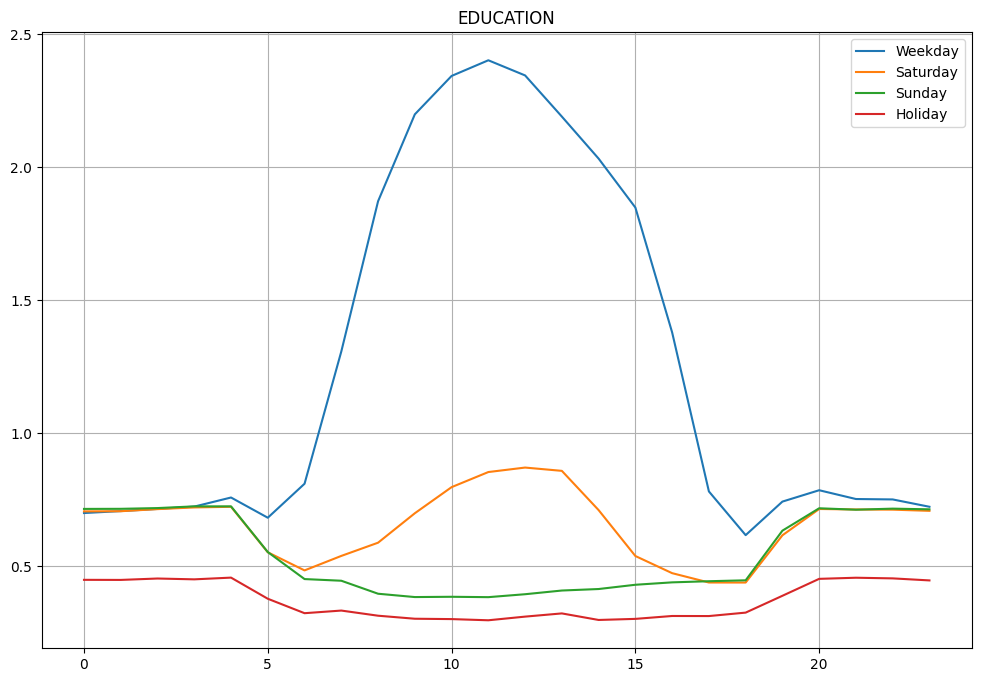

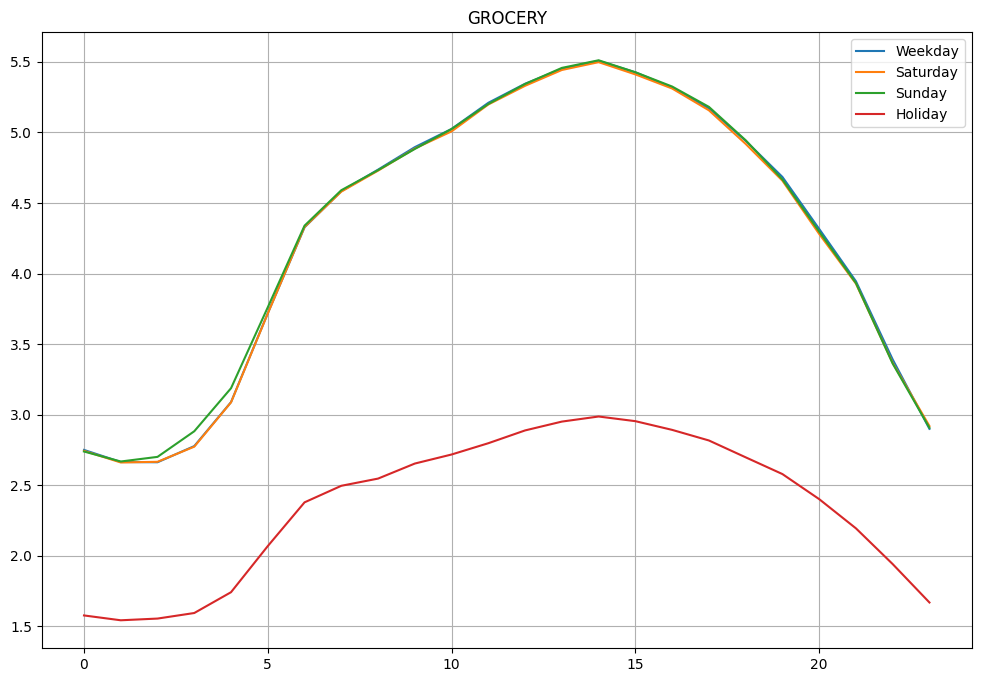

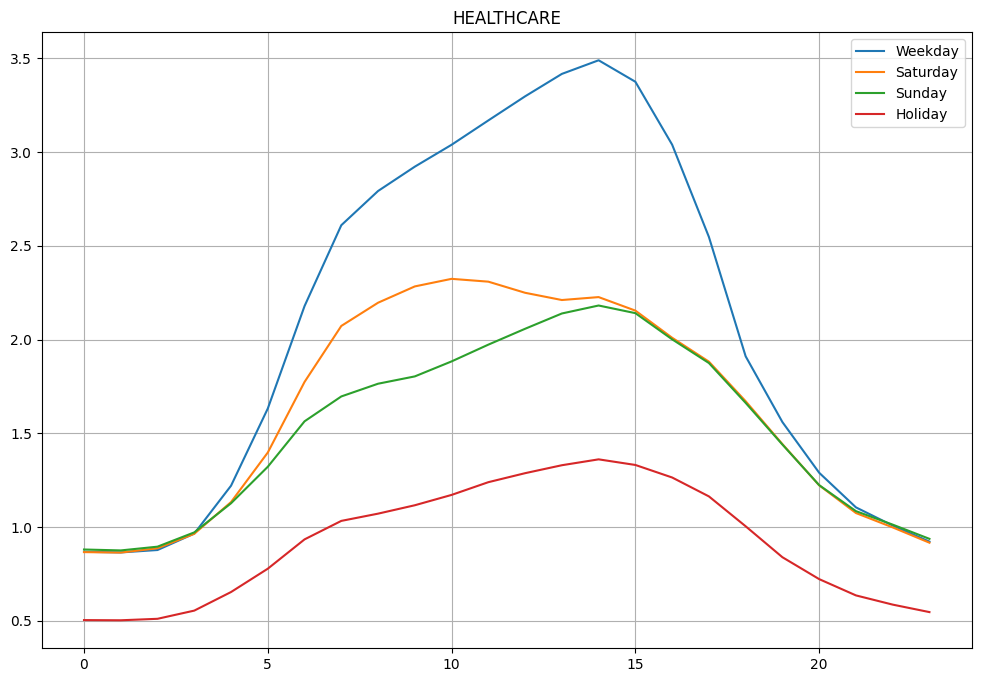

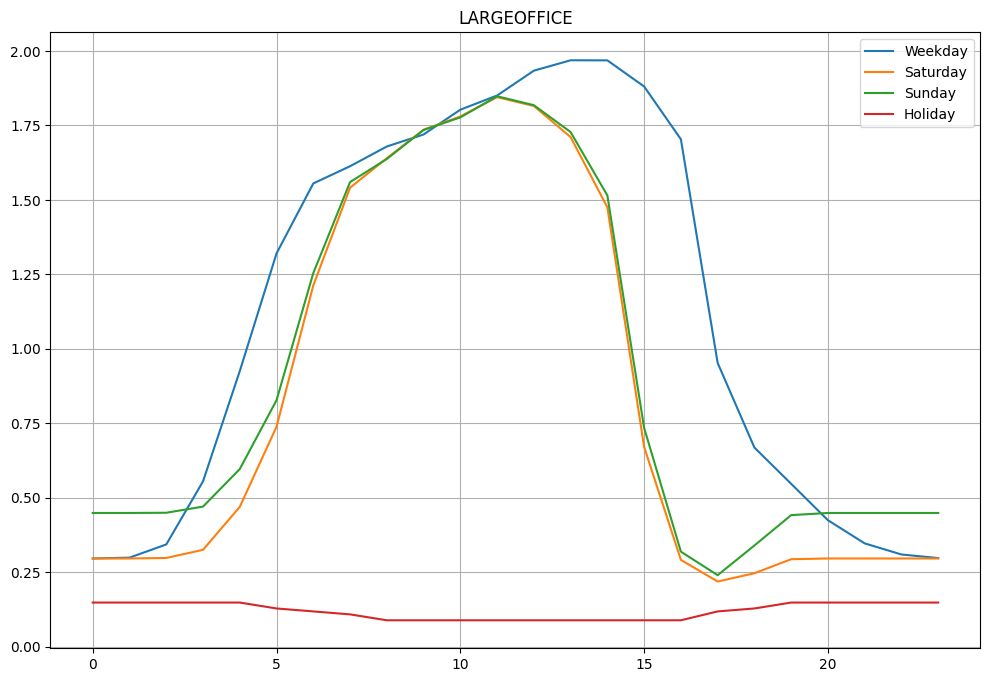

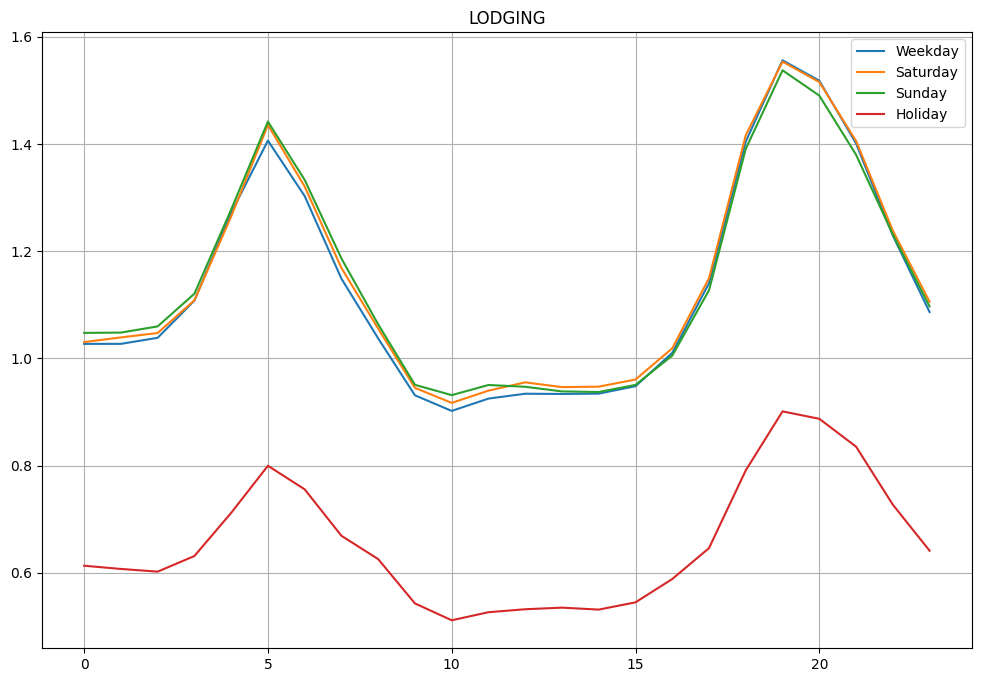

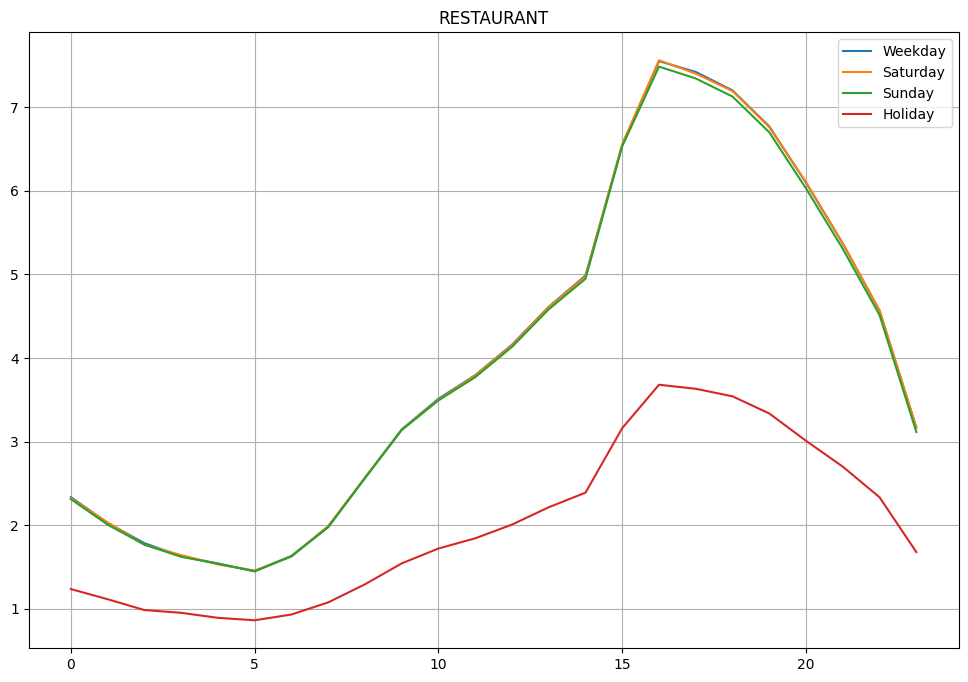

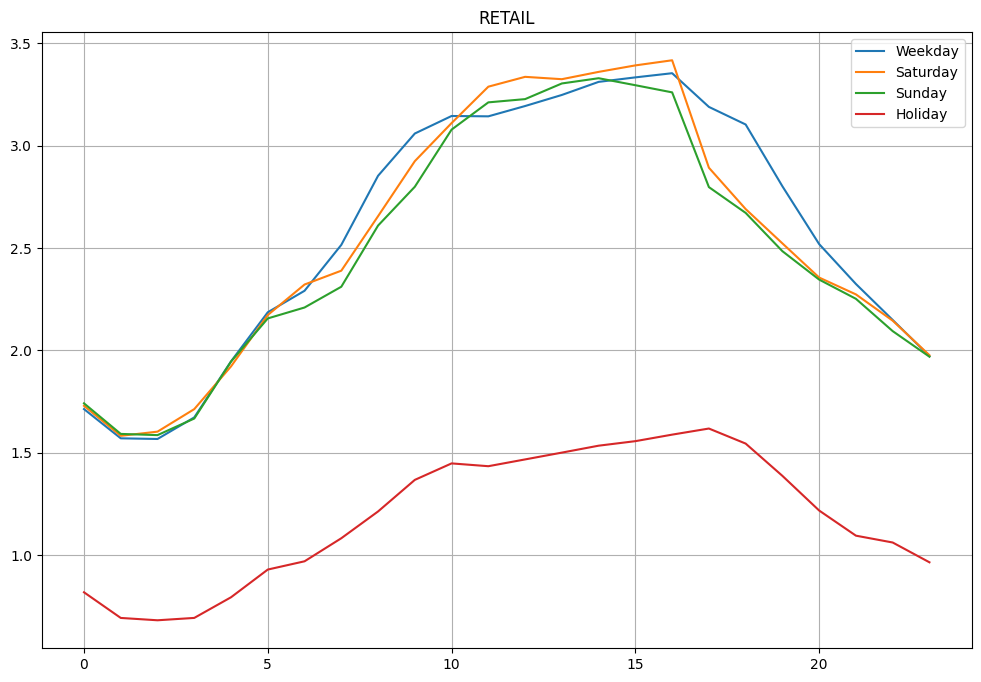

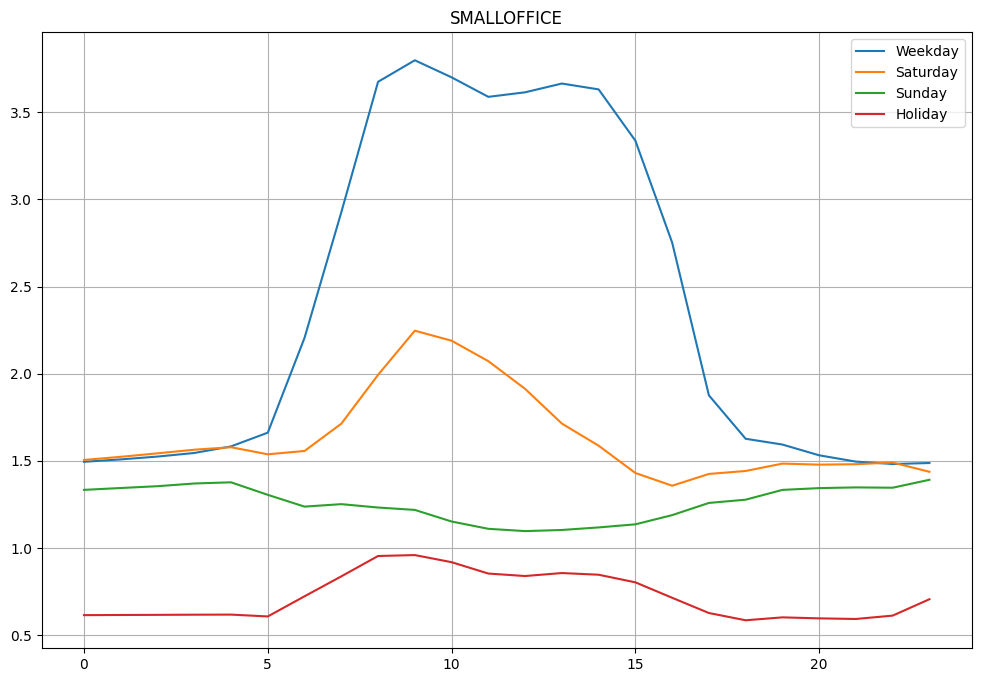

In [14]:
import matplotlib.pyplot as plt
for BT in enduse_data.index.get_level_values(1).unique():
    print("Plotting",BT,"...",flush=True)
    ls = enduse_data.loc[1,BT].sum(axis=1).groupby(['daytype','hour']).mean()
    plt.figure(figsize=(12,8))
    plt.plot(ls['WEEKDAY'],label='Weekday')
    plt.plot(ls['SATURDAY'],label='Saturday')
    plt.plot(ls['SUNDAY'],label='Sunday')
    plt.plot(ls['HOLIDAY'],label='Holiday')
    plt.grid()
    plt.legend()
    plt.title(BT)

This is the final data file that needs to be updated

In [20]:
building_enduses = pandas.read_csv("../data/building_enduses.csv")
building_enduses

,building_type,load_component,heating,cooling,ventilation,hotwater,cooking,refrigeration,outdoor,lights,plugs,miscellaneous,process,motors,compressors
0,APARTMENT,MA,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
1,APARTMENT,MB,0.0,0.1,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0
2,APARTMENT,MC,0.0,0.1,0.0,0.4,0,0.0,0,0,0.0,0,0.1,0,1.0
3,APARTMENT,MD,0.1,0.8,0.0,0.0,0,1.0,0,0,0.0,0,0.0,1,0.0
4,APARTMENT,PE,0.0,0.0,1.0,0.0,1,0.0,0,0,0.5,0,0.1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,TOWNHOUSE,MC,0.0,0.1,0.0,0.4,0,0.0,0,0,0.0,0,0.1,0,1.0
80,TOWNHOUSE,MD,0.1,0.8,0.0,0.0,0,1.0,0,0,0.0,0,0.0,1,0.0
81,TOWNHOUSE,PE,0.0,0.0,1.0,0.0,1,0.0,0,0,0.5,0,0.1,0,0.0
82,TOWNHOUSE,PI,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN
